# Van Der Pol

$$
\frac{d^2x}{dt^2} = K(1-x^2)\frac{dx}{dt}-x
$$

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.animation as anm
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['savefig.facecolor'] = 'white'

## 準備

まず  
$$
x_0 = x, \quad x_1 = \frac{dx}{dt}
$$
とおいて，一階の線形常微分方程式に変換する．  
$$
\begin{bmatrix}
\dot{x_0}\\
\dot{x_1}\\
\end{bmatrix} = \begin{bmatrix}
x_1\\
K(1-x_0^2)x_1-x_0\\
\end{bmatrix}
$$
このODEを解く．  
  
初期値，パラメータ，シミュレーション時間等を次にする．  

In [2]:
K = 1
x0_0 = 1
x1_0 = 1
T_SPAN = 50
TIME_INTERVAL = 0.01

# 実装
scipyのソルバを使用した例  

Text(0.5, 0, 'time')

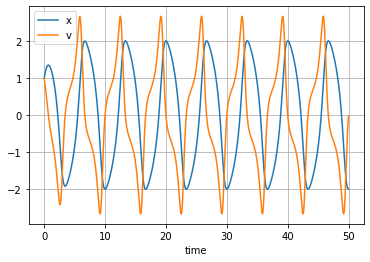

In [3]:
def dx(t, x, K):
    return [
        x[1],
        K*(1-x[0]**2)*x[1] - x[0]
    ]

sol = integrate.solve_ivp(
    fun = dx,
    t_span = (0, T_SPAN),
    y0 = [x0_0, x1_0],
    t_eval = np.arange(0, T_SPAN, TIME_INTERVAL),
    args = (K,)
)


plt.plot(sol.t, sol.y[0], label='x')
plt.plot(sol.t, sol.y[1], label='v')
plt.grid(); plt.legend(); plt.xlabel("time")

Text(0.5, 1.0, 'phase space')

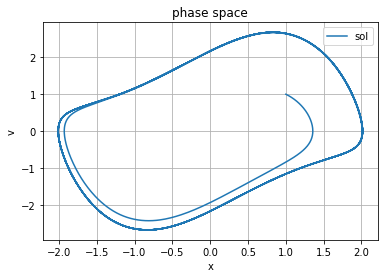

In [4]:
plt.plot(sol.y[0], sol.y[1], label="sol")
plt.grid(); plt.legend()
plt.xlabel("x"); plt.ylabel("v"); plt.title("phase space")

Text(0.5, 1.0, 'vector field')

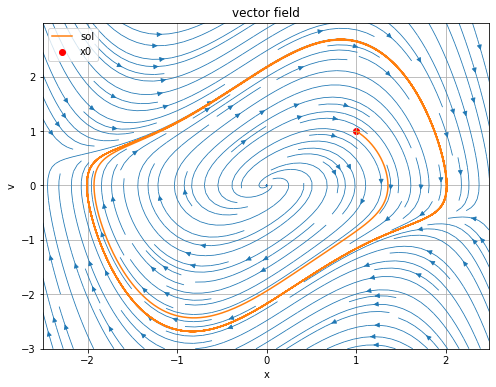

In [5]:
x, y= np.meshgrid(np.arange(-2.5, 2.5, 0.01), np.arange(-3, 3, 0.01))
fx = y
fy = K * (1-x**2)*y-x

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.streamplot(x,y,fx,fy, linewidth=0.8,density=1.5)
ax.plot(sol.y[0], sol.y[1], label="sol")
ax.scatter([x0_0], [x1_0], label="x0", c="r")
ax.grid()
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_title("vector field")

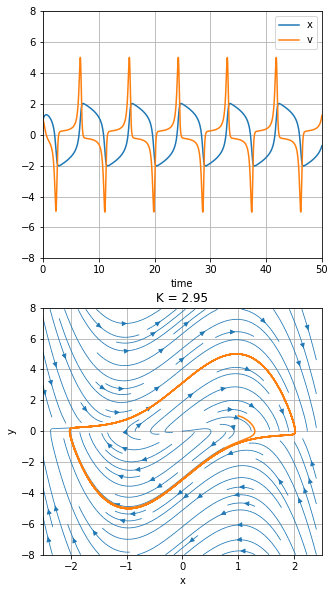

In [8]:
K_range = np.arange(0, 3, 0.05)
sols = []
for k in K_range:
    sols.append(
        integrate.solve_ivp(
            fun = dx,
            t_span = (0, T_SPAN),
            y0 = [x0_0, x1_0],
            t_eval = np.arange(0, T_SPAN, TIME_INTERVAL),
            args = (k,)
        )
    )

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))
K_template = 'K = %.2f'

x, y= np.meshgrid(np.arange(-2.5, 2.5, 0.1), np.arange(-8, 8, 0.1))
fx = y

def update(i):
    axes[0].cla()
    axes[0].plot(sols[i].t, sols[i].y[0], label="x")
    axes[0].plot(sols[i].t, sols[i].y[1], label="v")
    axes[0].grid()
    axes[0].legend()
    axes[0].set_xlim(0, 50)
    axes[0].set_ylim(-8, 8)
    axes[0].set_xlabel("time")
    
    fy = K_range[i] * (1-x**2)*y-x
    
    axes[1].cla()
    axes[1].streamplot(x,y,fx,fy, linewidth=0.8,density=1.)
    axes[1].plot(sols[i].y[0], sols[i].y[1])
    axes[1].grid()
    axes[1].set_xlabel("x")
    axes[1].set_ylabel("y")
    axes[1].set_title(K_template % K_range[i])
    axes[1].set_xlim(-2.5, 2.5)
    axes[1].set_ylim(-8, 8)

ani = anm.FuncAnimation(
    fig = fig,
    func = update,
    frames = len(K_range),
    interval=1000
)
HTML(ani.to_jshtml())

In [11]:
ani.save('vdp.gif', writer='pillow', fps=60)

![pic](vdp.gif)

# 